In [ ]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.figsize"] = [10, 5]
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

import numpy as np

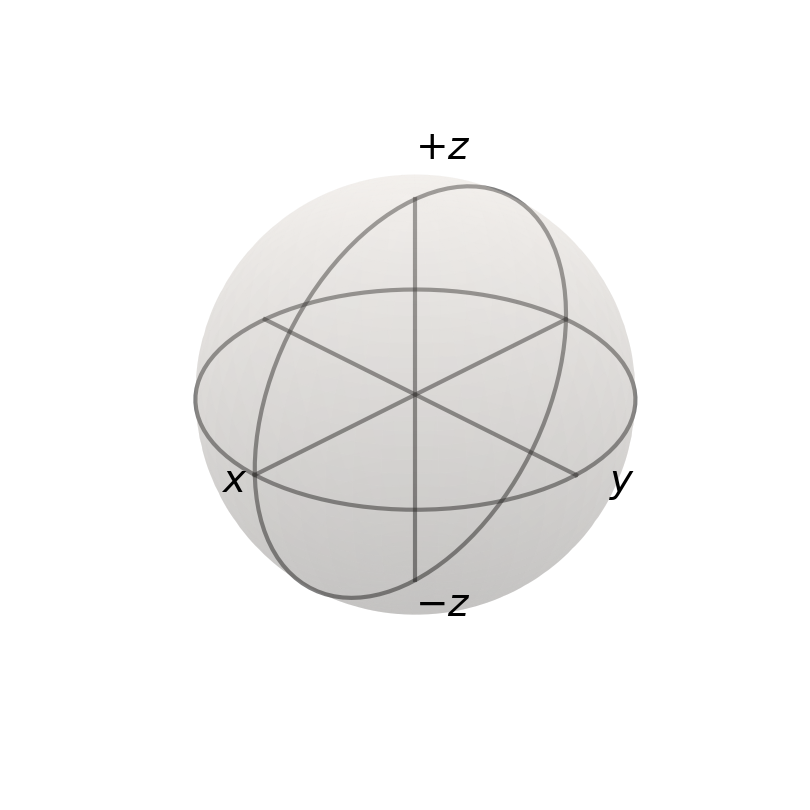

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect("equal")


# Make data
r = 1
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = r * np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='linen', alpha=0.2)

# plot circular curves over the surface
theta = np.linspace(0, 2 * np.pi, 100)
z = np.zeros(100)
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, color='black', alpha=0.50)
ax.plot(y, z, x, color='black', alpha=0.50)

## add axis lines
zeros = np.zeros(1000)
line = np.linspace(-r,r,1000)

ax.plot(line, zeros, zeros, color='black', alpha=0.50)
ax.plot(zeros, line, zeros, color='black', alpha=0.50)
ax.plot(zeros, zeros, line, color='black', alpha=0.50)

# draw a point
eps = 0.2
ax.text(1+eps,0,0,'$x$')
ax.text(0,1+eps,0,'$y$')
ax.text(0,0,1+eps,'$+z$')
ax.text(0,0,-1-eps,'$-z$')


ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)


ax.set_axis_off()
ax.azim = 45

plt.show()

In [ ]:
# Sets up the fig and ax for a Bloch sphere
def bloch_sphere():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect("equal")


    # Make data
    r = 1
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v))
    y = r * np.outer(np.sin(u), np.sin(v))
    z = r * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the surface
    ax.plot_surface(x, y, z, color='linen', alpha=0.2)

    # plot circular curves over the surface
    theta = np.linspace(0, 2 * np.pi, 100)
    z = np.zeros(100)
    x = r * np.sin(theta)
    y = r * np.cos(theta)

    ax.plot(x, y, z, color='black', alpha=0.50)
    ax.plot(y, z, x, color='black', alpha=0.50)

    ## add axis lines
    zeros = np.zeros(1000)
    line = np.linspace(-r,r,1000)

    ax.plot(line, zeros, zeros, color='black', alpha=0.50)
    ax.plot(zeros, line, zeros, color='black', alpha=0.50)
    ax.plot(zeros, zeros, line, color='black', alpha=0.50)

    # draw a point
    eps = 0.2
    ax.text(1+eps,0,0,'$x$')
    ax.text(0,1+eps,0,'$y$')
    ax.text(0,0,1+eps,'$+z$')
    ax.text(0,0,-1-eps,'$-z$')


    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-1,1)


    ax.set_axis_off()
    ax.azim = 45

    return fig, ax


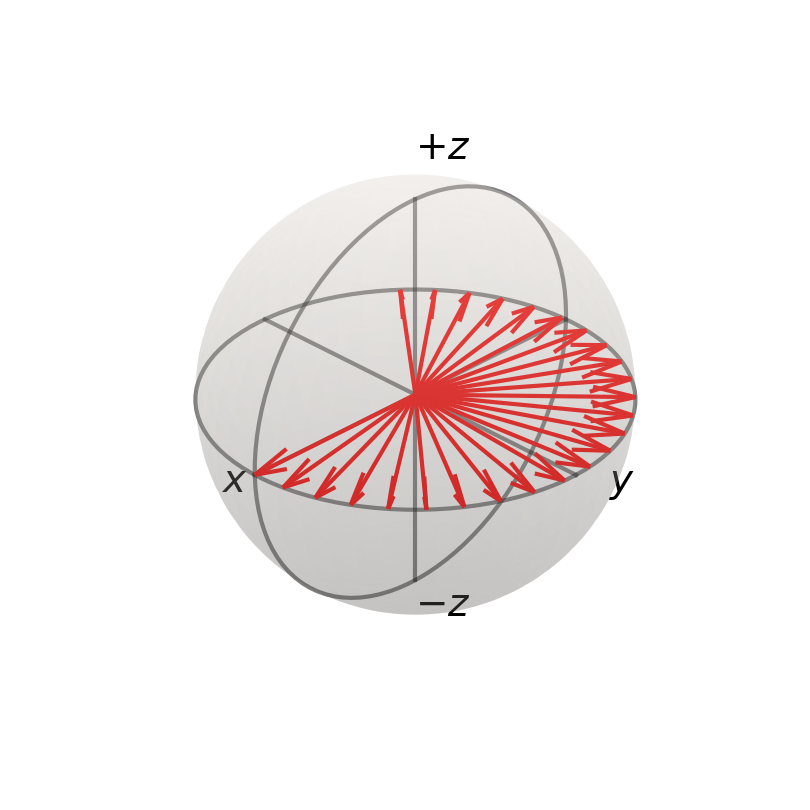

In [ ]:
# Let's draw some vectors

fig, ax = bloch_sphere()


N = 25 #number of arrows
thetas = np.linspace(0, 4, N) # parameterising the arrows
# heads of the arrows with adjusted arrow head length
bvecs = []
for i in range(len(thetas)):
    bvecs.append([np.cos(thetas[i]), np.sin(thetas[i]), 0])
bvecs = np.array(bvecs)

# tails of the arrows
tails= np.zeros(N)

ax.quiver(tails,tails,tails,bvecs[:,0], bvecs[:,1], bvecs[:,2], length=1.0, normalize=True, color='r', arrow_length_ratio=0.2)

plt.show()

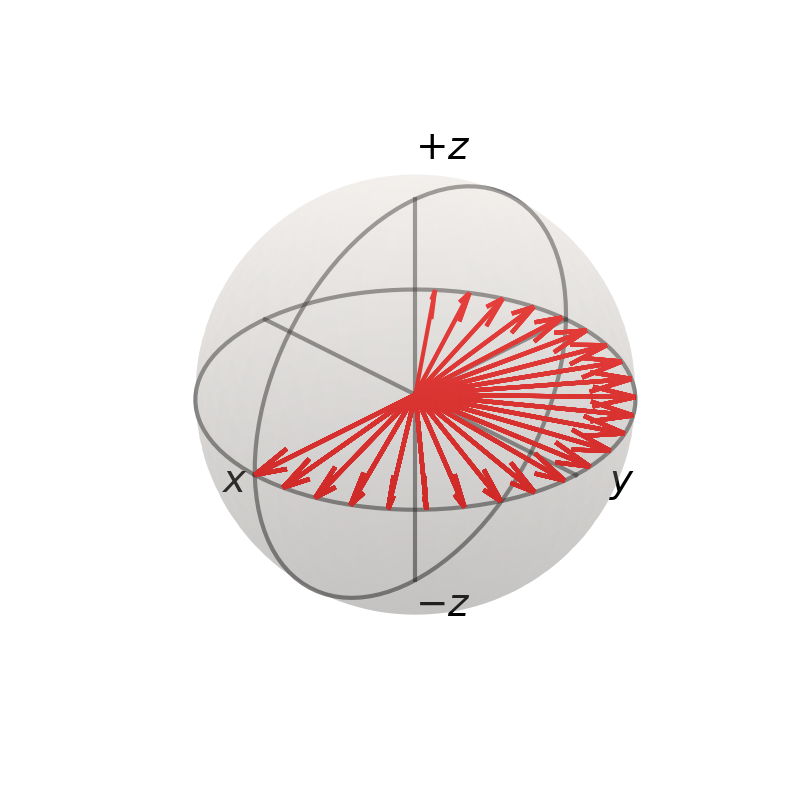

In [ ]:
# Let's animate this

fig, ax = bloch_sphere()

N = 25 #number of arrows
thetas = np.linspace(0, 4, N) # parameterising the arrows
# heads of the arrows with adjusted arrow head length
bvecs = []
for i in range(len(thetas)):
    bvecs.append([np.cos(thetas[i]), np.sin(thetas[i]), 0])
bvecs = np.array(bvecs)

# tails of the arrows
tails= np.zeros(N)

def update(num):
    ax.quiver(tails[:num],tails[:num],tails[:num],bvecs[:num,0], bvecs[:num,1], bvecs[:num,2],
              length=1.0, normalize=True, color='r', arrow_length_ratio=0.2)

ani = animation.FuncAnimation(fig, update, N, interval=1000/N, blit=False)
ani.save('my_animation.gif')
plt.show()


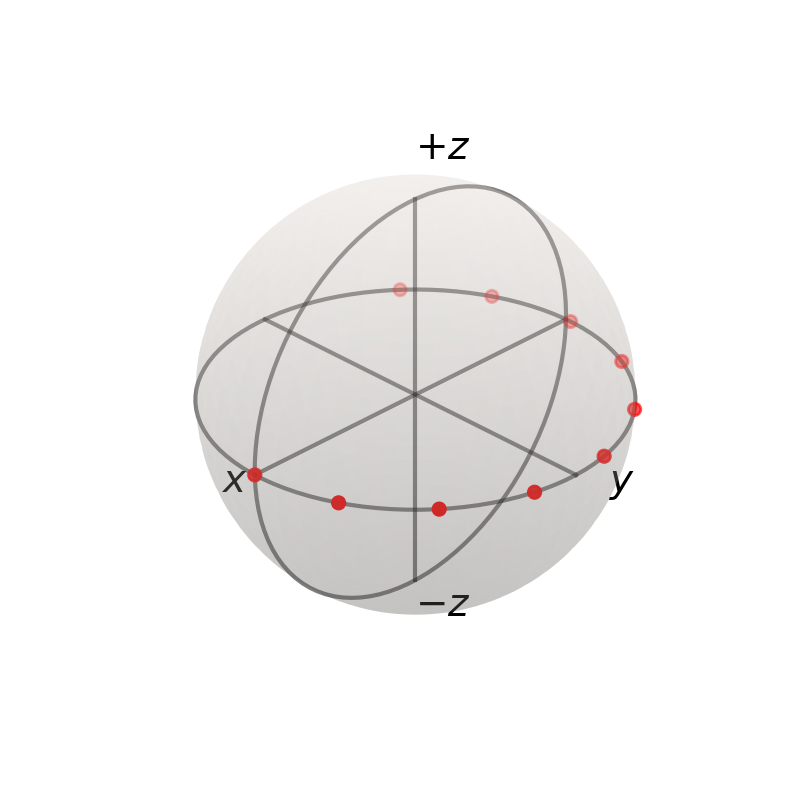

In [ ]:
# Let's draw some points

fig, ax = bloch_sphere()

N = 10 # number of points
thetas = np.linspace(0, 4, N)

# points on bloch sphere
points = []
for i in range(len(thetas)):
    points.append([np.cos(thetas[i]), np.sin(thetas[i]), 0])
points = np.array(points)

ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='r')

plt.show()

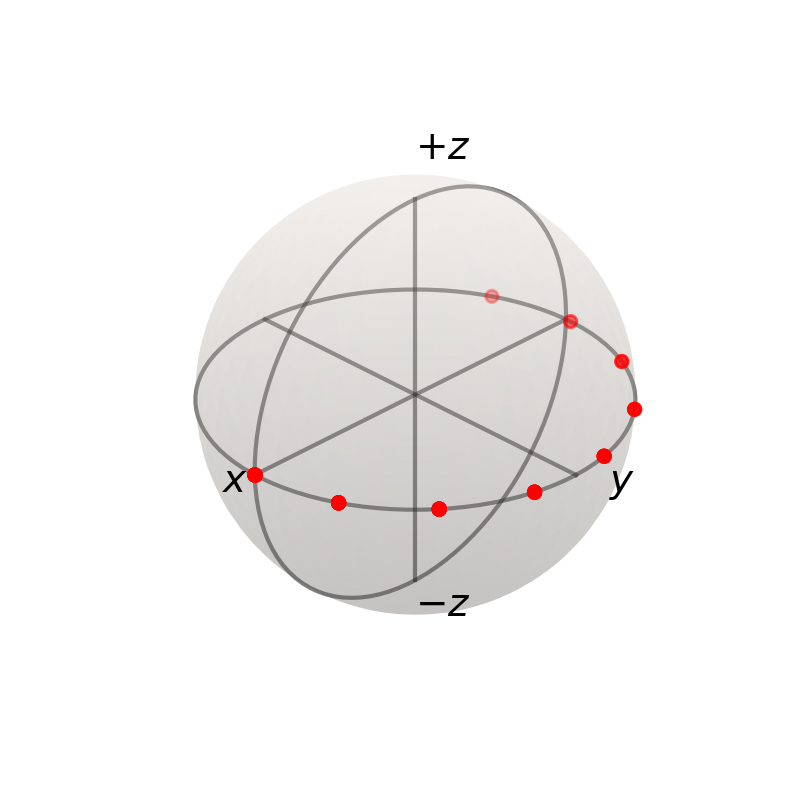

In [ ]:
# Let's animate the points

fig, ax = bloch_sphere()

N = 10 # number of points
thetas = np.linspace(0, 4, N)

# points on bloch sphere
points = []
for i in range(len(thetas)):
    points.append([np.cos(thetas[i]), np.sin(thetas[i]), 0])
points = np.array(points)

def update(num):
    ax.scatter(points[:num, 0], points[:num, 1], points[:num, 2], color='r')

ani = animation.FuncAnimation(fig, update, N, interval=1000/N, blit=False)
ani.save('my_animation2.gif')
plt.show()